In [1]:
import keras
from keras.utils import to_categorical #one-hot encoding
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from keras.datasets import mnist    #NIST提供的手寫數字圖片
(train_images,train_labels),(test_images,test_labels) = mnist.load_data() #總共70,000張,train_images:60,000. test_images=10,000

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
train_labels[0]

5

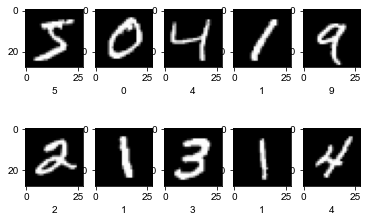

In [6]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_images[i],cmap=plt.cm.gray)
    plt.xlabel(str(train_labels[i]))

plt.show()

In [7]:
# normalization(加速梯度下降的收斂)
train_images_normal=train_images/255
test_images_normal=test_images/255

# 因為損失函數將使用categorical_crossentropy,需要對label進行one-hot encoding
train_labels_oh=to_categorical(train_labels)
test_labels_oh=to_categorical(test_labels)

In [8]:
train_labels[0]

5

In [9]:
train_labels_oh[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
# 建立模型
# 1.輸入層：原本為(28,28),經過平坦化(1維)成為(768,)
# 2.隱藏層：100個神經元,活化函數使用Relu
# 3.輸出層：10個輸出結果,活化函數使用softmax,可讓10個輸出結果的可能出現機率,加總後為1

model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))

#Dense為全連結層
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')

# model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [12]:
# 訓練模型並將訓練過程所產生的資訊儲存在model_train
# 可根據下面所繪製的train accuracy與validation accuracy圖,設定不同的epochs
model_train=model.fit(train_images_normal,train_labels_oh,epochs=30,batch_size=128,validation_data=(test_images_normal,test_labels_oh))

Epoch 1/30
469/469 [==============================] - 1s 2ms/step - loss: 0.6559 - accuracy: 0.8197 - val_loss: 0.2153 - val_accuracy: 0.9382
Epoch 2/30
469/469 [==============================] - 0s 1ms/step - loss: 0.1929 - accuracy: 0.9453 - val_loss: 0.1542 - val_accuracy: 0.9552
Epoch 3/30
469/469 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.9612 - val_loss: 0.1219 - val_accuracy: 0.9635
Epoch 4/30
469/469 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9695 - val_loss: 0.1065 - val_accuracy: 0.9687
Epoch 5/30
469/469 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9752 - val_loss: 0.1015 - val_accuracy: 0.9691
Epoch 6/30
469/469 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 0.9799 - val_loss: 0.0854 - val_accuracy: 0.9745
Epoch 7/30
469/469 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9840 - val_loss: 0.0870 - val_accuracy: 0.9741
Epoch 

In [13]:
# 測試模型效果
model.evaluate(test_images_normal,test_labels_oh,batch_size=128)

79/79 [==============================] - 0s 701us/step - loss: 0.1017 - accuracy: 0.9767


[0.10169127583503723, 0.9767000079154968]

In [14]:
model.predict(test_images_normal[:1])

array([[4.3361777e-12, 6.8830976e-17, 3.3953662e-09, 1.9386379e-04,
        4.5382499e-18, 3.4990431e-11, 1.3481044e-21, 9.9980575e-01,
        2.3571177e-07, 6.8086500e-08]], dtype=float32)

In [15]:
np.argmax(model.predict(test_images_normal[:1]), axis=-1)

array([7])

In [16]:
model.predict_classes(test_images_normal[:1])

/Users/frank/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])

In [17]:
model.predict(test_images_normal)

array([[4.3361608e-12, 6.8830976e-17, 3.3953402e-09, ..., 9.9980575e-01,
        2.3570998e-07, 6.8085974e-08],
       [1.9169829e-16, 2.5480812e-08, 1.0000000e+00, ..., 1.3983854e-25,
        8.2729240e-14, 2.6321008e-20],
       [5.0294401e-11, 9.9994254e-01, 8.0423406e-06, ..., 1.4140994e-05,
        3.4623059e-05, 6.1740460e-11],
       ...,
       [8.9774618e-23, 8.2792443e-20, 3.7757597e-23, ..., 8.8861817e-12,
        4.2954027e-13, 1.1403747e-08],
       [3.3030637e-16, 3.1712933e-17, 2.2844560e-19, ..., 8.6990524e-18,
        4.8533497e-09, 1.0936678e-18],
       [4.7615467e-17, 3.5831473e-22, 1.7713654e-15, ..., 4.3604126e-26,
        2.6882155e-20, 7.1911641e-18]], dtype=float32)

In [18]:
model_pred = np.argmax(model.predict(test_images_normal),axis=-1) 
model_pred

array([7, 2, 1, ..., 4, 5, 6])

In [19]:
pd.crosstab(test_labels, model_pred, rownames=['真實數字'], colnames=['預測數字'])

預測數字,0,1,2,3,4,5,6,7,8,9
真實數字,,,,,,,,,,
0,970,0,1,2,0,0,3,1,2,1
1,0,1124,4,1,0,0,3,0,3,0
2,1,4,1004,5,1,0,1,5,10,1
3,0,0,3,990,0,4,0,6,4,3
4,2,0,1,1,954,0,7,4,0,13
5,3,0,0,14,1,866,3,1,2,2
6,3,3,1,2,3,2,943,0,0,1
7,1,4,6,5,0,1,1,996,6,8
8,4,2,5,12,3,4,5,2,933,4


In [20]:
model_train.history

{'loss': [0.37987303733825684,
  0.1806585192680359,
  0.13193291425704956,
  0.10319086164236069,
  0.08437980711460114,
  0.07036309689283371,
  0.0601089745759964,
  0.05195729807019234,
  0.04514748603105545,
  0.03913818299770355,
  0.033526383340358734,
  0.029592301696538925,
  0.026292189955711365,
  0.022264933213591576,
  0.01946377009153366,
  0.016839198768138885,
  0.014390585944056511,
  0.013067159801721573,
  0.01095308642834425,
  0.00998568907380104,
  0.008805941790342331,
  0.008034379221498966,
  0.006375115364789963,
  0.007069945335388184,
  0.005583241116255522,
  0.003904324257746339,
  0.0028722567949444056,
  0.003373925108462572,
  0.005820678547024727,
  0.0033867033198475838],
 'accuracy': [0.8957333564758301,
  0.9486333131790161,
  0.9628166556358337,
  0.9705166816711426,
  0.9762166738510132,
  0.9797333478927612,
  0.9830833077430725,
  0.985450029373169,
  0.9871666431427002,
  0.9891999959945679,
  0.9911666512489319,
  0.9918666481971741,
  0.99290

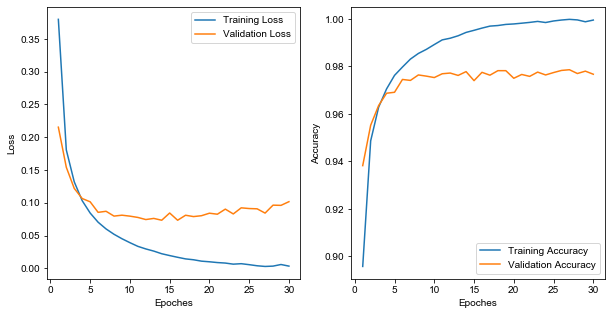

In [21]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
train_loss=model_train.history['loss']
train_val_loss=model_train.history['val_loss']
train_epochs=range(1,len(train_loss)+1)
ax1.plot(train_epochs,train_loss,label='Training Loss')
ax1.plot(train_epochs,train_val_loss,label='Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()

ax2=plt.subplot(1,2,2)
train_acc=model_train.history['accuracy']
train_val_acc=model_train.history['val_accuracy']
train_epochs=range(1,len(train_loss)+1)
ax2.plot(train_epochs,train_acc,label='Training Accuracy')
ax2.plot(train_epochs,train_val_acc,label='Validation Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# 建立模型,加上Dropout層用以對抗overfit
# 1.輸入層：原本為(28,28),經過平坦化(1維)成為(768,)
# 2.隱藏層：100個神經元,活化函數使用Relu
# 4.丟棄層：丟棄20%的神經元結果,讓模型更具泛化能力
# 4.輸出層：10個輸出結果,活化函數使用softmax,可讓10個輸出結果的可能出現機率,加總後為1

model1=keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=(28,28)))
model1.add(keras.layers.Dense(units=100,activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Dense(units=10,activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics='accuracy')
model1_train=model1.fit(train_images_normal,train_labels_oh,epochs=30,batch_size=128,validation_data=(test_images_normal,test_labels_oh))

Epoch 1/30
469/469 [==============================] - 1s 1ms/step - loss: 0.7124 - accuracy: 0.7930 - val_loss: 0.2093 - val_accuracy: 0.9401
Epoch 2/30
469/469 [==============================] - 1s 1ms/step - loss: 0.2314 - accuracy: 0.9347 - val_loss: 0.1510 - val_accuracy: 0.9554
Epoch 3/30
469/469 [==============================] - 1s 1ms/step - loss: 0.1718 - accuracy: 0.9502 - val_loss: 0.1265 - val_accuracy: 0.9634
Epoch 4/30
469/469 [==============================] - 1s 1ms/step - loss: 0.1468 - accuracy: 0.9559 - val_loss: 0.1126 - val_accuracy: 0.9676
Epoch 5/30
469/469 [==============================] - 1s 1ms/step - loss: 0.1202 - accuracy: 0.9651 - val_loss: 0.0968 - val_accuracy: 0.9718
Epoch 6/30
469/469 [==============================] - 1s 1ms/step - loss: 0.1077 - accuracy: 0.9687 - val_loss: 0.0936 - val_accuracy: 0.9719
Epoch 7/30
469/469 [==============================] - 1s 1ms/step - loss: 0.0900 - accuracy: 0.9724 - val_loss: 0.0866 - val_accuracy: 0.9739
Epoch 

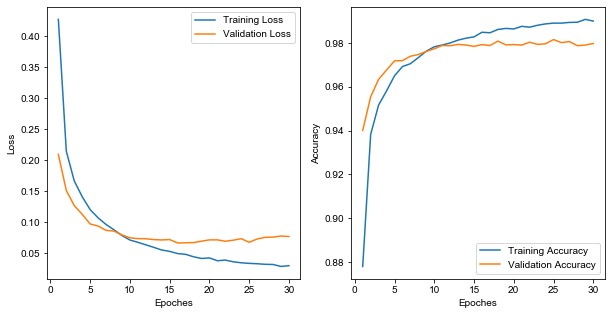

In [24]:
plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
train_loss1=model1_train.history['loss']
train_val_loss1=model1_train.history['val_loss']
train_epochs1=range(1,len(train_loss1)+1)
ax1.plot(train_epochs1,train_loss1,label='Training Loss')
ax1.plot(train_epochs1,train_val_loss1,label='Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()

ax2=plt.subplot(1,2,2)
train_acc1=model1_train.history['accuracy']
train_val_acc1=model1_train.history['val_accuracy']
train_epochs1=range(1,len(train_loss1)+1)
ax2.plot(train_epochs1,train_acc1,label='Training Accuracy')
ax2.plot(train_epochs1,train_val_acc1,label='Validation Accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()
plt.show()